## Costumer Segmentation

To analyze customer loyalty or attrition and examine the differences in spending habits in an online retail setting, we'll proceed through a series of steps using the data you've provided. Here's a general outline of the process:

1. **Data Loading and Initial Exploration**: We'll start by loading your data and conducting a preliminary analysis to understand its structure, quality, and the types of data it contains.

2. **Data Cleaning and Preparation**: Based on our initial exploration, we may need to clean and prepare the data for analysis. This can include handling missing values, removing duplicates, and possibly transforming data for better analysis.

3. **Feature Engineering**: We'll create new features that might be relevant for our analysis, like total spending per customer, frequency of purchases, etc.

4. **Analysis of Customer Loyalty and Attrition**: We'll use the data to identify patterns that might indicate customer loyalty or attrition. This can involve looking at factors like purchase frequency, changes in spending over time, and product preferences.

5. **Comparison of Spending Habits**: We'll compare customers who spend above and below a certain threshold to see if there are any significant differences in their behavior or preferences.

6. **Conclusion and Insights**: Based on our findings, we'll draw conclusions and provide insights into customer behavior and spending patterns.

Let's start with step 1: **Data Loading and Initial Exploration**. I'll load the data and provide an overview of its contents. After this, let me know if you'd like to proceed to the next step.


In [1]:
# ! pip install pandas
import pandas as pd

# Load the data
file_path = '../data/online_retail.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for initial exploration
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# save it in excel format saving space as much as possible removing some rows 
# create a version that contains 300000 randomly selected 
# rows from the original dataset
data.sample(n=300000).to_excel('../data/online_retail_300k.xlsx', index=False)



In [18]:
# print first 3 dataset random examples in markdown table format removing the index column
# ! pip install tabulate
from tabulate import tabulate
print(tabulate(data.sample(3), headers='keys', tablefmt='pipe', showindex=False))

|   Invoice |   StockCode | Description                  |   Quantity | InvoiceDate         |   Price |   Customer ID | Country        |
|----------:|------------:|:-----------------------------|-----------:|:--------------------|--------:|--------------:|:---------------|
|    538071 |       21990 | MODERN FLORAL STATIONERY SET |          2 | 2010-12-09 14:09:00 |    2.51 |           nan | United Kingdom |
|    510054 |       20749 | ASSORTED COLOUR MINI CASES   |          4 | 2010-05-27 09:59:00 |    7.95 |         17499 | United Kingdom |
|    506992 |       22470 | HEART OF WICKER LARGE        |          4 | 2010-05-05 13:50:00 |    2.95 |         15023 | United Kingdom |


The dataset contains the following columns:

1. **Invoice**: The invoice number for each transaction.
2. **StockCode**: The item's stock code.
3. **Description**: Description of the product.
4. **Quantity**: The quantity of each item per transaction.
5. **InvoiceDate**: The date and time of the invoice.
6. **Price**: Price per unit of the item.
7. **Customer ID**: Unique identifier for each customer.
8. **Country**: Country of the customer.

Next steps would involve checking for missing values, data types, and basic statistics of the dataset. 

In [19]:
# Checking for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

# Basic statistics of the dataset
basic_stats = data.describe(include='all')

The analysis of missing values and data types reveals the following:

- **Missing Values**:
  - `Description`: 4,382 missing values.
  - `Customer ID`: 243,007 missing values.
  - Other columns have no missing values.

- **Data Types**:
  - `Invoice`, `StockCode`, `Description`, `Country`: Object (likely strings).
  - `Quantity`: Integer.
  - `InvoiceDate`: Object, but should be a datetime for analysis.
  - `Price`: Float.
  - `Customer ID`: Float, but should likely be an integer or categorical type.

- **Basic Statistics**:
  - The dataset has 1,067,371 rows.
  - There are 53,628 unique invoices and 5,305 unique stock codes.
  - The `Quantity` and `Price` columns have a wide range, indicating possible outliers or errors (e.g., negative values).

The next steps would involve:
1. Converting `InvoiceDate` to a datetime format.
2. Addressing the missing values, especially in `Customer ID` and `Description`.
3. Investigating and handling the negative values in `Quantity` and `Price`.

In [20]:
# Converting InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Investigating negative values in Quantity and Price
negative_quantity = data[data['Quantity'] < 0]
negative_price = data[data['Price'] < 0]

# Handling missing values:
# For Customer ID, rows with missing values might be removed since they are crucial for customer analysis.
# For Description, missing values might be less critical but should be examined.
data_cleaned = data.dropna(subset=['Customer ID'])
missing_description_after = data_cleaned['Description'].isnull().sum()

negative_quantity.shape[0], negative_price.shape[0], missing_description_after, data_cleaned.shape

(22950, 5, 0, (824364, 8))

The data cleaning steps have resulted in the following:

1. **Negative Values**:
   - There were 22,950 rows with negative `Quantity`.
   - There were 5 rows with negative `Price`.

2. **Handling Missing Values**:
   - Rows with missing `Customer ID` were removed. This is crucial for customer analysis.
   - After removing rows with missing `Customer ID`, there are no longer any missing values in the `Description` column.

3. **Dataset Size**:
   - The cleaned dataset now contains 824,364 rows, reduced from the original 1,067,371 rows.

The negative values in `Quantity` and `Price` might represent returns or corrections, which could be important for understanding customer behavior. However, they might need to be treated differently from regular transactions.

The next steps could involve:
- Further exploration of the negative values to understand their nature.
- Creating derived metrics for customer analysis (e.g., total spending per customer, purchase frequency).
- Starting the analysis of customer loyalty and attrition.

In [21]:
# Creating derived metrics for customer analysis

# Total spending per customer
data_cleaned['TotalSpend'] = data_cleaned['Quantity'] * data_cleaned['Price']
customer_spending = data_cleaned.groupby('Customer ID')['TotalSpend'].sum()

# Purchase frequency per customer
customer_frequency = data_cleaned.groupby('Customer ID')['Invoice'].nunique()

# Average spending per invoice per customer
customer_avg_spend = customer_spending / customer_frequency

# Combine these metrics into a single DataFrame
customer_metrics = pd.DataFrame({
    'TotalSpend': customer_spending,
    'Frequency': customer_frequency,
    'AvgSpendPerInvoice': customer_avg_spend
})

customer_metrics.head()

/var/folders/94/x3ml_gpx1fqdj4djb6rrt3640000gp/T/ipykernel_59289/1225981214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TotalSpend'] = data_cleaned['Quantity'] * data_cleaned['Price']


,TotalSpend,Frequency,AvgSpendPerInvoice
Customer ID,,,
12346.0,-64.68,17,-3.804706
12347.0,5633.32,8,704.165000
12348.0,2019.40,5,403.880000
12349.0,4404.54,5,880.908000
12350.0,334.40,1,334.400000


The derived metrics for customer analysis are as follows:

1. **Total Spending Per Customer**: The total amount spent by each customer.
2. **Purchase Frequency Per Customer**: The number of distinct invoices (i.e., unique purchases) per customer.
3. **Average Spending Per Invoice Per Customer**: The average amount spent per invoice for each customer.

Here's a preview of these metrics for the first few customers:

| Customer ID | Total Spend | Frequency | Avg Spend Per Invoice |
|-------------|-------------|-----------|-----------------------|
| 12346.0     | -64.68      | 17        | -3.80                 |
| 12347.0     | 5633.32     | 8         | 704.17                |
| 12348.0     | 2019.40     | 5         | 403.88                |
| 12349.0     | 4404.54     | 5         | 880.91                |
| 12350.0     | 334.40      | 1         | 334.40                |

Note: Negative values in 'Total Spend' suggest returns or corrections in those customers' transactions.

The next steps could involve:

- Analyzing these metrics to uncover patterns of customer loyalty or attrition.
- Segmenting customers based on their spending habits (e.g., high spenders vs. low spenders).

In [22]:
# Segmenting customers into high spenders and low spenders
# We can use the median of total spending as a threshold to define high and low spenders

median_spend = customer_metrics['TotalSpend'].median()

# Create segments
customer_metrics['SpendingCategory'] = 'Low Spender'
customer_metrics.loc[customer_metrics['TotalSpend'] >
                     median_spend, 'SpendingCategory'] = 'High Spender'

# Summarizing the two segments
segment_summary = customer_metrics.groupby('SpendingCategory').agg(
    TotalCustomers=('TotalSpend', 'count'),
    AverageSpend=('TotalSpend', 'mean'),
    AverageFrequency=('Frequency', 'mean'),
    AverageSpendPerInvoice=('AvgSpendPerInvoice', 'mean')
)

segment_summary.reset_index()

,SpendingCategory,TotalCustomers,AverageSpend,AverageFrequency,AverageSpendPerInvoice
0,High Spender,2971,5276.243210,12.963312,409.219962
1,Low Spender,2971,327.355709,2.141367,177.131333


The segmentation of customers into high spenders and low spenders, based on the median total spending, yields the following insights:

| Spending Category | Total Customers | Average Spend | Average Frequency | Average Spend Per Invoice |
|-------------------|-----------------|---------------|-------------------|---------------------------|
| High Spender      | 2,971           | £5,276.24     | 12.96             | £409.22                   |
| Low Spender       | 2,971           | £327.36       | 2.14              | £177.13                   |

- **High Spenders**: On average, high spenders have a significantly higher total spend, more frequent purchases, and a higher average spend per invoice compared to low spenders.
- **Low Spenders**: This group has a considerably lower average total spend, fewer purchase occasions, and lower spending per invoice.

This segmentation can provide valuable insights for targeted marketing, customer relationship management, and resource allocation.

### Creating a decision tree-based predictor for the "Spending Category" 

To create a comprehensive decision tree model, we'll include a rich set of features from both the original dataset and the derived metrics. Here's how we'll proceed:

1. **Feature Engineering**: We'll use the original dataset to create additional features that might be relevant for predicting the spending category. This could include:
   - Time-based features (e.g., month or day of week of the purchase).
   - Diversity of products purchased (e.g., number of unique stock codes per customer).
   - Geographic information (e.g., country).

2. **Merging Features**: We'll combine these new features with the previously derived metrics (Total Spend, Frequency, Avg Spend Per Invoice).

3. **One-Hot Encoding**: For categorical variables (like Country), we'll use one-hot encoding to convert them into a format suitable for the decision tree model.

4. **Data Splitting**: After preparing the dataset, we'll split it into training, validation, and test sets.

I'll begin by engineering additional features and then merge them with the derived metrics.
The expanded dataset now includes:

1. **Original Derived Metrics**: Total Spend, Frequency, Avg Spend Per Invoice.
2. **Time-Based Features**: Month and Day of the Week of purchase.
3. **Product Diversity**: Number of unique stock codes per customer.
4. **Geographic Information**: One-hot encoded countries.

In [23]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Feature Engineering on the original dataset
# Extracting time-based features from InvoiceDate
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.dayofweek

# Counting the number of unique stock codes per customer
unique_stock_per_customer = data_cleaned.groupby(
    'Customer ID')['StockCode'].nunique().rename('UniqueStocks')

# Geographic information (Country) - This will be one-hot encoded later
# For now, we include the country as it is
country_per_customer = data_cleaned.groupby('Customer ID')['Country'].first()

# Merging the new features with the customer metrics
extended_features = customer_metrics.merge(
    unique_stock_per_customer, on='Customer ID')
extended_features = extended_features.merge(
    country_per_customer, on='Customer ID')

# One-hot encoding for the 'Country' feature
encoder = OneHotEncoder(sparse=False)
countries_encoded = encoder.fit_transform(extended_features[['Country']])
countries_encoded = pd.DataFrame(countries_encoded,
                                 columns=encoder.get_feature_names_out(
                                     ['Country']),
                                 index=extended_features.index)

# Adding the one-hot encoded countries back to the features
extended_features = pd.concat(
    [extended_features, countries_encoded], axis=1).drop('Country', axis=1)

# Preview the extended features
extended_features.head()

/var/folders/94/x3ml_gpx1fqdj4djb6rrt3640000gp/T/ipykernel_59289/2185083128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
/var/folders/94/x3ml_gpx1fqdj4djb6rrt3640000gp/T/ipykernel_59289/2185083128.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.dayofweek
/opt/homebrew/Caskroom/miniforge/base/envs/notebook39/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: Futu

,TotalSpend,Frequency,AvgSpendPerInvoice,SpendingCategory,UniqueStocks,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
Customer ID,,,,,,,,,,,,,,,,,,,,,
12346.0,-64.68,17,-3.804706,Low Spender,30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12347.0,5633.32,8,704.165000,High Spender,126,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,2019.40,5,403.880000,High Spender,25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,4404.54,5,880.908000,High Spender,139,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,334.40,1,334.400000,Low Spender,17,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# show me the first 5 columns of the extended features
extended_features.iloc[:, :5].reset_index().head()
# create markdown table
print(tabulate(extended_features.iloc[:, :5].reset_index().head(), headers='keys', tablefmt='pipe', showindex=False))

|   Customer ID |   TotalSpend |   Frequency |   AvgSpendPerInvoice | SpendingCategory   |   UniqueStocks |
|--------------:|-------------:|------------:|---------------------:|:-------------------|---------------:|
|         12346 |       -64.68 |          17 |             -3.80471 | Low Spender        |             30 |
|         12347 |      5633.32 |           8 |            704.165   | High Spender       |            126 |
|         12348 |      2019.4  |           5 |            403.88    | High Spender       |             25 |
|         12349 |      4404.54 |           5 |            880.908   | High Spender       |            139 |
|         12350 |       334.4  |           1 |            334.4     | Low Spender        |             17 |


In [25]:
from sklearn.model_selection import train_test_split


X = extended_features.drop('SpendingCategory', axis=1)
y = extended_features['SpendingCategory']

# Splitting the data into training, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

# Checking the shape of the splits
X_train.shape, X_validation.shape, X_test.shape

((3565, 45), (1188, 45), (1189, 45))

The dataset has been successfully split into training, validation, and test sets with the following distribution:

- **Training Set**: 3,565 samples
- **Validation Set**: 1,188 samples
- **Test Set**: 1,189 samples

Each set includes 45 features. This split ensures that we have a robust dataset for training the model, a separate set for tuning and validating the model's performance, and a final test set to evaluate the model's generalization to unseen data.

### Training a decision tree-based predictor

1. **Training the Model**: As before, we'll train the decision tree classifier.
2. **Visualizing the Decision Tree**: We'll use tools to visualize the structure of the trained decision tree.
3. **Evaluating the Model**: We'll evaluate the model's performance on the validation set and generate a classification report.
4. **Feature Importance Visualization**: We'll create a plot to visualize the importance of each feature in the decision tree.

Here's the code for these steps, including the visualizations:


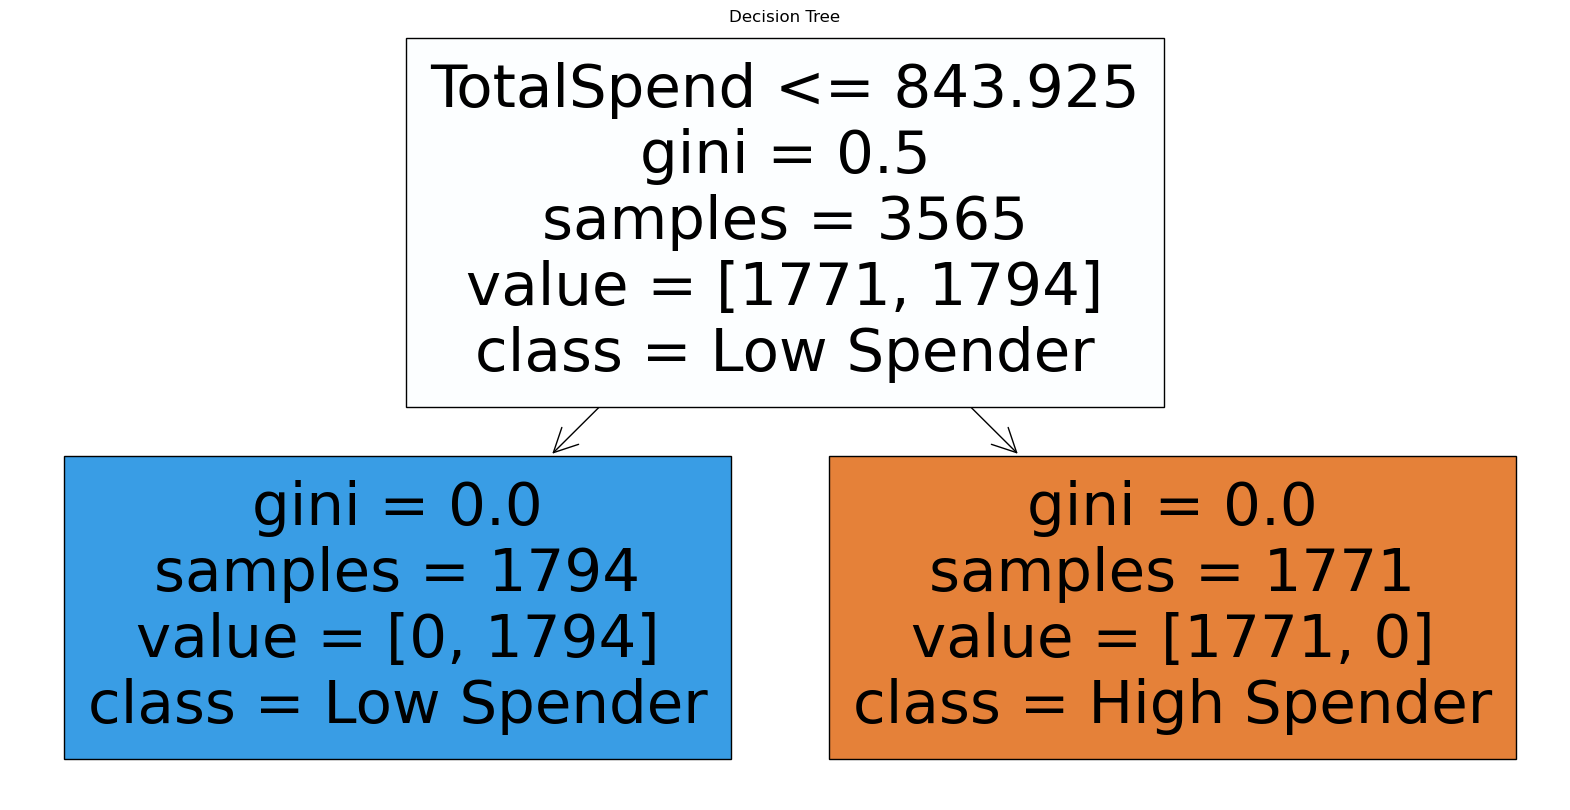

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# 1. Training the decision tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# 2. Visualizing the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns,
          class_names=dt_classifier.classes_)
plt.title("Decision Tree")
plt.show()

In [27]:
# 3. Evaluating the model on the validation set
y_validation_pred = dt_classifier.predict(X_validation)
accuracy = accuracy_score(y_validation, y_validation_pred)
classification_rep = classification_report(y_validation, y_validation_pred)

print("Accuracy on Validation Set:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy on Validation Set: 1.0

Classification Report:
               precision    recall  f1-score   support

High Spender       1.00      1.00      1.00       605
 Low Spender       1.00      1.00      1.00       583

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



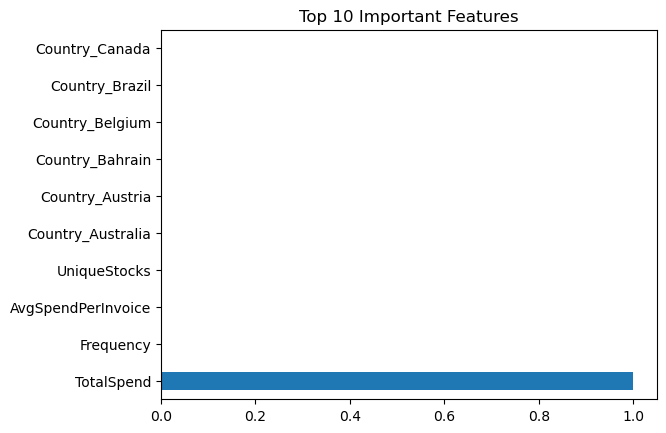

In [28]:
# 4. Visualizing feature importance
feature_importances = pd.Series(
    dt_classifier.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

**Note something wrong?**

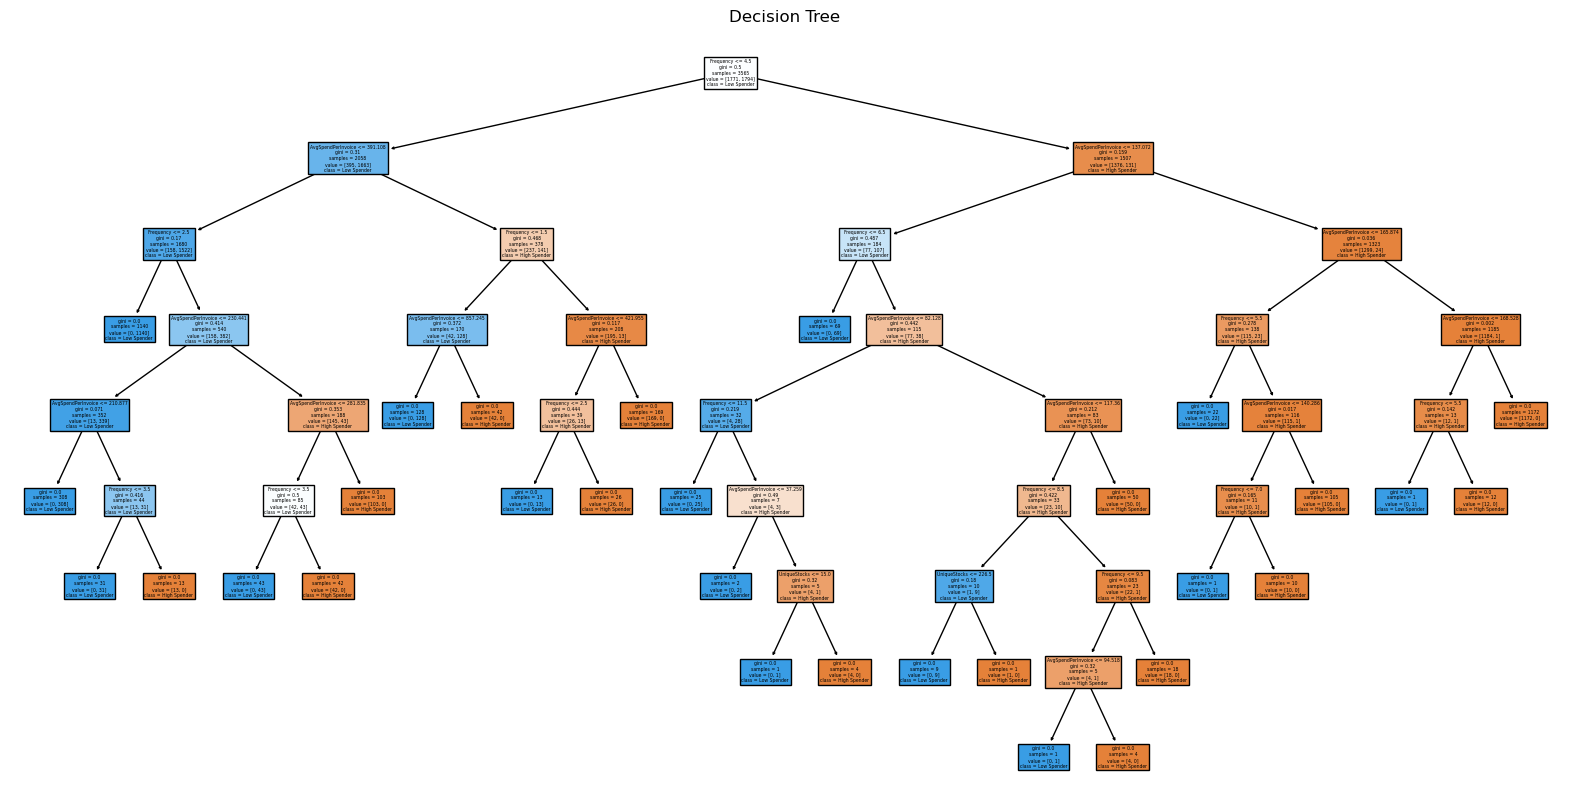

In [29]:
# Perform the same analysis removing TotalSpend
X = extended_features.drop(['SpendingCategory', 'TotalSpend'], axis=1)
y = extended_features['SpendingCategory']

# Splitting the data into training, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

# 1. Training the decision tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


# 2. Visualizing the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns,
          class_names=dt_classifier.classes_)
plt.title("Decision Tree")
plt.show()

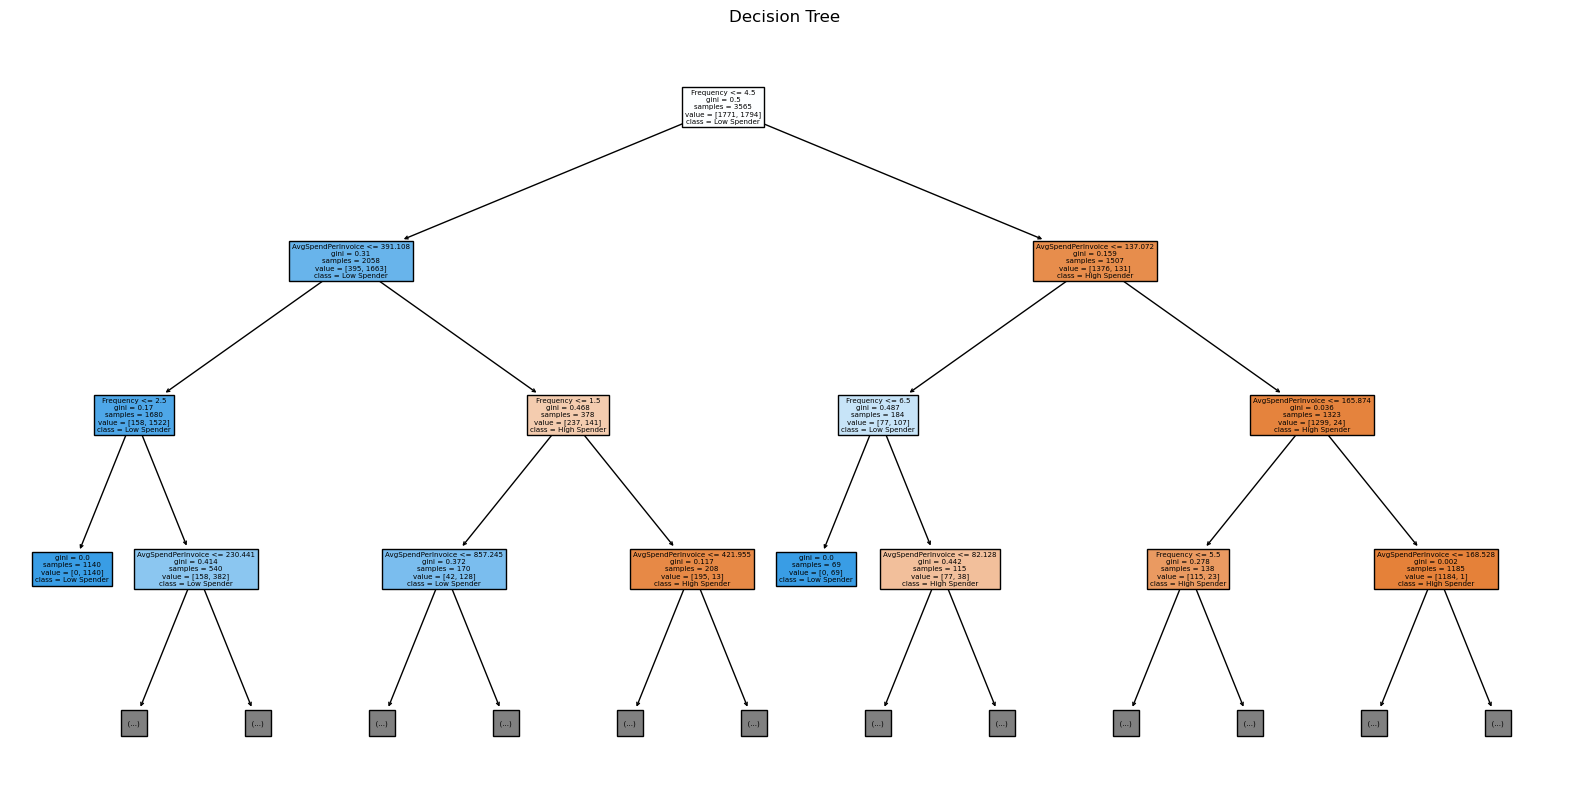

In [30]:
# show me the first 3 levels of the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns,
          class_names=dt_classifier.classes_, max_depth=3)
plt.title("Decision Tree")
plt.show()


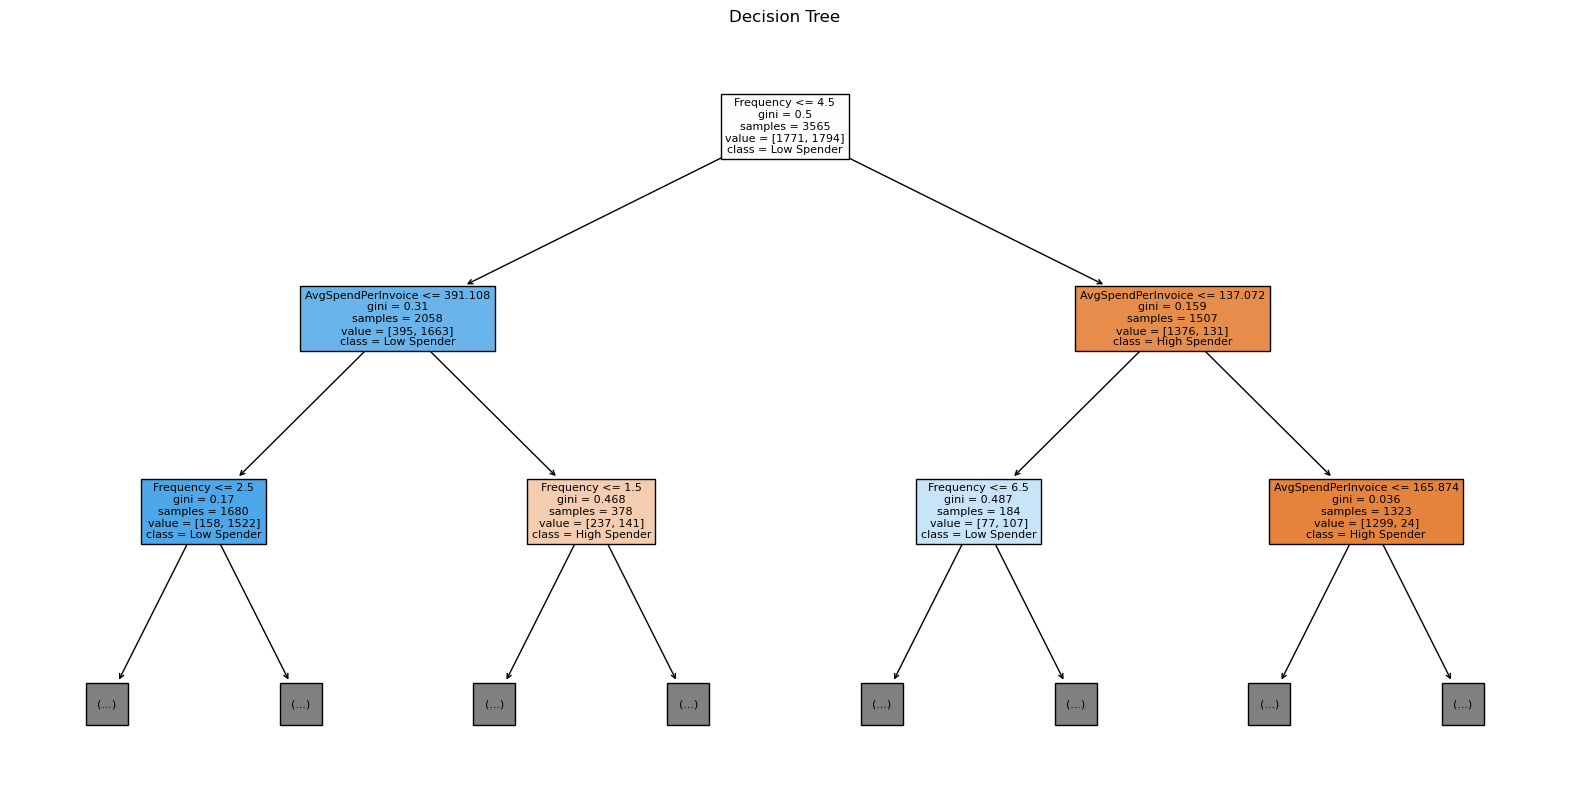

In [31]:
# Show me the first 2 levels of the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns,
          class_names=dt_classifier.classes_, max_depth=2)
plt.title("Decision Tree")
plt.show()

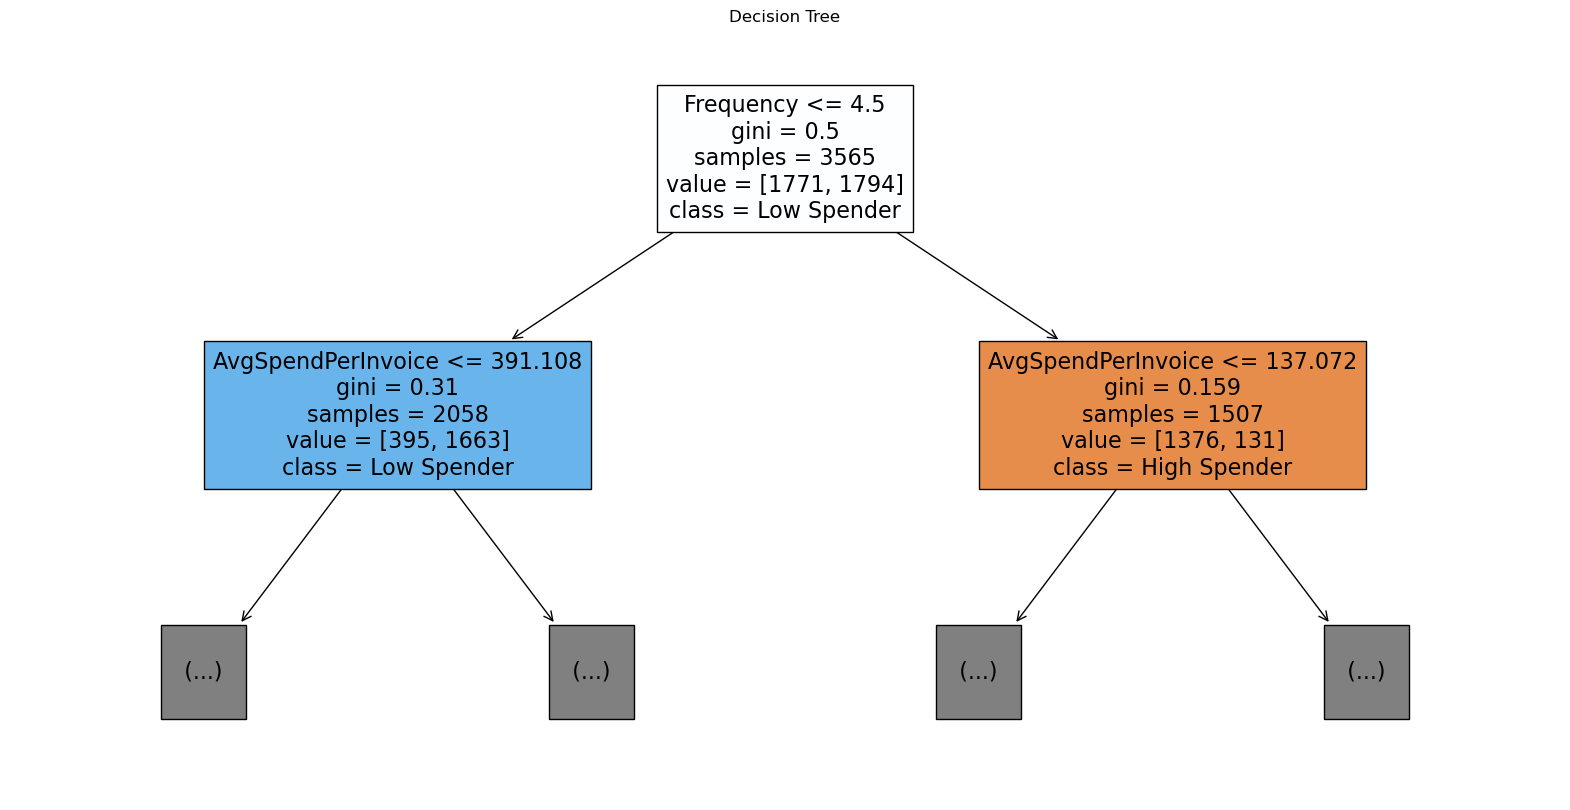

In [32]:
# show me the first level fo the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns,
          class_names=dt_classifier.classes_, max_depth=1)
plt.title("Decision Tree")
plt.show()

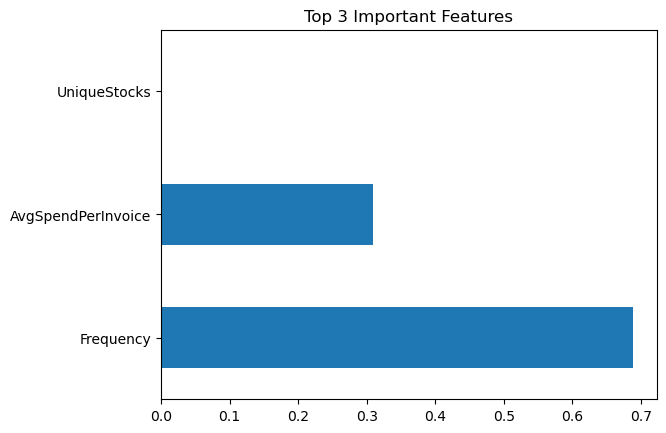

In [35]:
# 4. Visualizing feature importance
feature_importances = pd.Series(
    dt_classifier.feature_importances_, index=X_train.columns)
feature_importances.nlargest(3).plot(kind='barh')
plt.title("Top 3 Important Features")
plt.show()

In [28]:
# Evaluate the new model
y_validation_pred = dt_classifier.predict(X_validation)
accuracy = accuracy_score(y_validation, y_validation_pred)
classification_rep = classification_report(y_validation, y_validation_pred)

print("Accuracy on Validation Set:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy on Validation Set: 0.9941077441077442

Classification Report:
               precision    recall  f1-score   support

High Spender       1.00      0.99      0.99       605
 Low Spender       0.99      1.00      0.99       583

    accuracy                           0.99      1188
   macro avg       0.99      0.99      0.99      1188
weighted avg       0.99      0.99      0.99      1188



### Time-based segmentation analysis

We'll focus on identifying early indicators of whether a customer will be a low spender. The approach involves segmenting customer data based on a specific time frame from their first purchase and analyzing spending patterns within that period. 

Here's a step-by-step process for this analysis:

1. **Define the Time Frame for Early Prediction**: Decide on the time period after the first purchase that you consider "early". This could be, for example, the first month or the first three purchases.

2. **Segment Customers Based on First Purchase Date**: Group customers based on their first purchase date.

3. **Calculate Spending in the Defined Time Frame**: For each customer, calculate the total spending, frequency of purchases, and other relevant metrics within the defined early time frame.

4. **Label Customers as High or Low Spenders**: Based on the spending in the early time frame, label each customer as a potential high spender or low spender. You may use a threshold like the median spending in this early phase.

5. **Analyze Patterns and Differences**: Compare the characteristics of early high spenders and low spenders. Look for patterns in product preferences, purchase frequency, average order value, etc.

6. **Build Predictive Model (Optional)**: If you have sufficient data, you could build a predictive model to classify new customers as high or low spenders based on their behavior in the initial period.


#### 60-day time frame

We'll focus on the first 60 days of a customer's interaction with the online retail platform for this time-based segmentation analysis. The goal is to identify whether a customer can be classified as a high spender or a low spender based on their behavior during this initial period.

Here's the plan for the analysis:

1. **Identify First Purchase Date for Each Customer**: We'll determine the date of the first purchase for each customer.

2. **Calculate Total Spending in the First 60 Days**: For each customer, we'll calculate their total spending within 60 days of their first purchase.

3. **Determine High vs. Low Spenders**: We'll use a threshold (like the median spending of all customers in their first 60 days) to label each customer as a high spender or a low spender.

4. **Analyze Patterns and Differences**: We'll look for any distinct patterns in the behavior of high spenders versus low spenders during the first 60 days.

Let's start with **Steps 1 and 2: Identify First Purchase Date and Calculate Total Spending in the First 60 Days**.

In [20]:
# Step 1: Identify First Purchase Date for Each Customer
first_purchase_date = data_cleaned.groupby(
    'Customer ID')['InvoiceDate'].min().rename('FirstPurchaseDate')

# Step 2: Calculate Total Spending in the First 60 Days for Each Customer
# Merging the first purchase date with the main data
data_with_first_purchase = data_cleaned.merge(
    first_purchase_date, on='Customer ID')

# Filtering transactions that occurred within 60 days of the first purchase
within_60_days = data_with_first_purchase[data_with_first_purchase['InvoiceDate'] <=
                                          data_with_first_purchase['FirstPurchaseDate'] + pd.Timedelta(days=60)]

# Calculating total spend within 60 days for each customer
spend_within_60_days = within_60_days.groupby('Customer ID')[
    'TotalSpend'].sum()

# Preview the data
spend_within_60_days.head()

Customer ID
12346.0     100.00
12347.0    2035.11
12348.0     222.16
12349.0     -24.15
12350.0     334.40
Name: TotalSpend, dtype: float64

We have calculated the total spending for each customer within the first 60 days of their first purchase. Here's a preview of the spending data for the first few customers:

| Customer ID | Total Spend in First 60 Days |
|-------------|-----------------------------|
| 12346.0     | £100.00                     |
| 12347.0     | £2035.11                    |
| 12348.0     | £222.16                     |
| 12349.0     | -£24.15 (indicates returns) |
| 12350.0     | £334.40                     |

In [21]:
# Step 1: Determine the Final Spending Category of Each Customer
# We will use the total spending from the customer metrics calculated earlier for the final classification
final_spending_category = customer_metrics['SpendingCategory']

# Merging the final spending category with the early spending data
spend_60_days_with_final_category = pd.DataFrame({
    'TotalSpend60Days': spend_within_60_days,
    'FinalSpenderCategory': final_spending_category
})

# Dropping any rows where we don't have final spending category information
spend_60_days_with_final_category.dropna(inplace=True)

# Preview of the data with final spending category
spend_60_days_with_final_category.head()

,TotalSpend60Days,FinalSpenderCategory
Customer ID,,
12346.0,100.00,Low Spender
12347.0,2035.11,High Spender
12348.0,222.16,High Spender
12349.0,-24.15,High Spender
12350.0,334.40,Low Spender


The data now includes each customer's total spending in the first 60 days and their final spending category, determined using the overall spending behavior from the entire dataset. Here's a preview:

| Customer ID | Total Spend in First 60 Days | Final Spender Category |
|-------------|------------------------------|------------------------|
| 12346.0     | £100.00                      | Low Spender            |
| 12347.0     | £2035.11                     | High Spender           |
| 12348.0     | £222.16                      | High Spender           |
| 12349.0     | -£24.15                      | High Spender           |
| 12350.0     | £334.40                      | Low Spender            |

The next step is to **analyze the predictive power of early spending behavior**. We will investigate how well the spending in the first 60 days predicts the final spending category of customers.

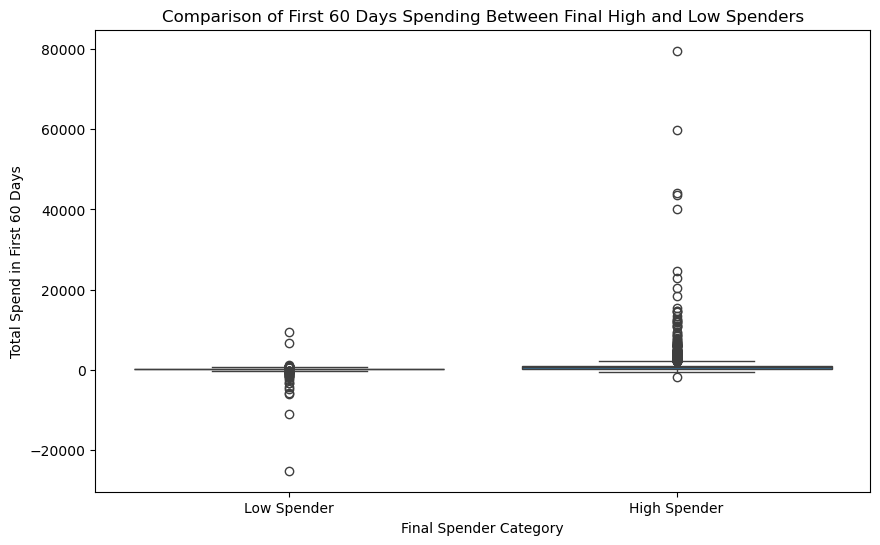

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correcting the error and creating the visualization again
plt.figure(figsize=(10, 6))
sns.boxplot(x='FinalSpenderCategory', y='TotalSpend60Days',
            data=spend_60_days_with_final_category)
plt.title('Comparison of First 60 Days Spending Between Final High and Low Spenders')
plt.ylabel('Total Spend in First 60 Days')
plt.xlabel('Final Spender Category')
plt.show()